In [1]:
import pyart
import matplotlib.pyplot as plt
from matplotlib import ticker, colors
import numpy as np
import os
from JSAnimation import IPython_display
from matplotlib.animation import FuncAnimation

%matplotlib inline


In [2]:
indir = '/data/sample_sapr_data/nsa_2015/'
all_files = os.listdir(indir)
ppis = []
for fl in all_files:
    if 'BRW' in fl and os.stat(os.path.join(indir, fl)).st_size > 900000:
        ppis.append(os.path.join(indir, fl))
ppis.sort()

In [3]:
print ppis

['/data/sample_sapr_data/nsa_2015/BRW150702110356.RAW2V2D', '/data/sample_sapr_data/nsa_2015/BRW150702111022.RAW2V2E', '/data/sample_sapr_data/nsa_2015/BRW150702111646.RAW2V2F', '/data/sample_sapr_data/nsa_2015/BRW150702112308.RAW2V2G', '/data/sample_sapr_data/nsa_2015/BRW150702112933.RAW2V2H', '/data/sample_sapr_data/nsa_2015/BRW150702113557.RAW2V2J', '/data/sample_sapr_data/nsa_2015/BRW150702114222.RAW2V2K', '/data/sample_sapr_data/nsa_2015/BRW150702114848.RAW2V2L', '/data/sample_sapr_data/nsa_2015/BRW150702115510.RAW2V2M']


In [4]:
radar = pyart.io.read(ppis[5])

In [5]:
print(radar.fields.keys())

['differential_phase', 'cross_correlation_ratio', 'normalized_coherent_power', 'spectrum_width', 'total_power', 'reflectivity', 'differential_reflectivity', 'specific_differential_phase', 'velocity']


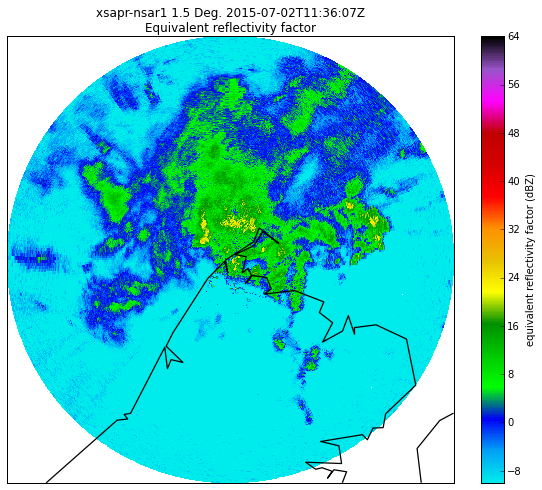

In [6]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('reflectivity', sweep = 2, resolution = 'i',
                    vmin = -10, vmax = 64, mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef)


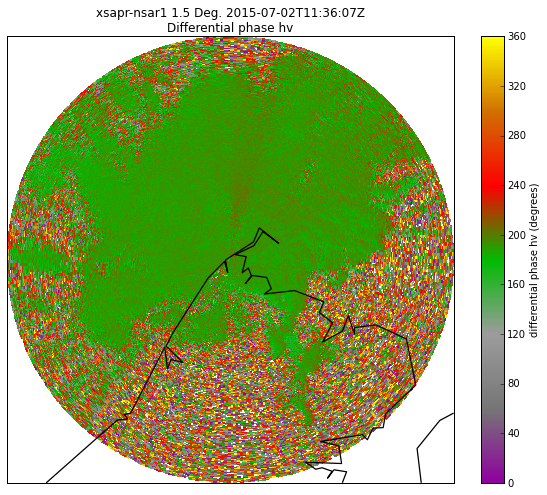

In [8]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('differential_phase', sweep = 2, resolution = 'i',
                    vmin = 0, vmax = 360, mask_outside = False,
                    cmap = pyart.graph.cm.NWS_SPW)


In [9]:
phidp_text = pyart.retrieve.texture_of_complex_phase(radar)
radar.add_field('differential_phase_texture', phidp_text, replace_existing = True)

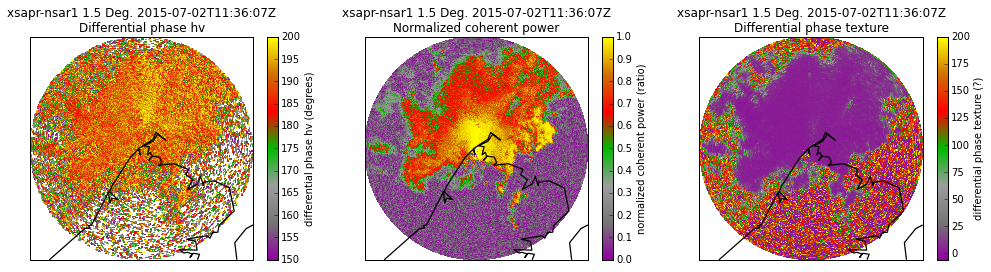

In [11]:
#create an instance of the class using our radar
display = pyart.graph.RadarMapDisplay(radar)
#create a Matplotlib figure
f = plt.figure(figsize = [17,4])
#now we are going to do a three panel plot, resolution is a basemap parameter and determines the resolution of 
#the coastline.. here we set to intermediate or 'i' ('h' for high 'l' for low)
plt.subplot(1, 3, 1) 
display.plot_ppi_map('differential_phase', sweep = 2, vmin = 150, vmax = 200, 
                     resolution = 'i', cmap = pyart.graph.cm.NWS_SPW)
plt.subplot(1, 3, 2) 
display.plot_ppi_map('normalized_coherent_power', sweep = 2, vmin = 0, vmax = 1,
                     resolution = 'i', cmap = pyart.graph.cm.NWS_SPW)
plt.subplot(1, 3, 3) 
display.plot_ppi_map('differential_phase_texture', sweep = 2, vmax = 200,
                     resolution = 'i', cmap = pyart.graph.cm.NWS_SPW)

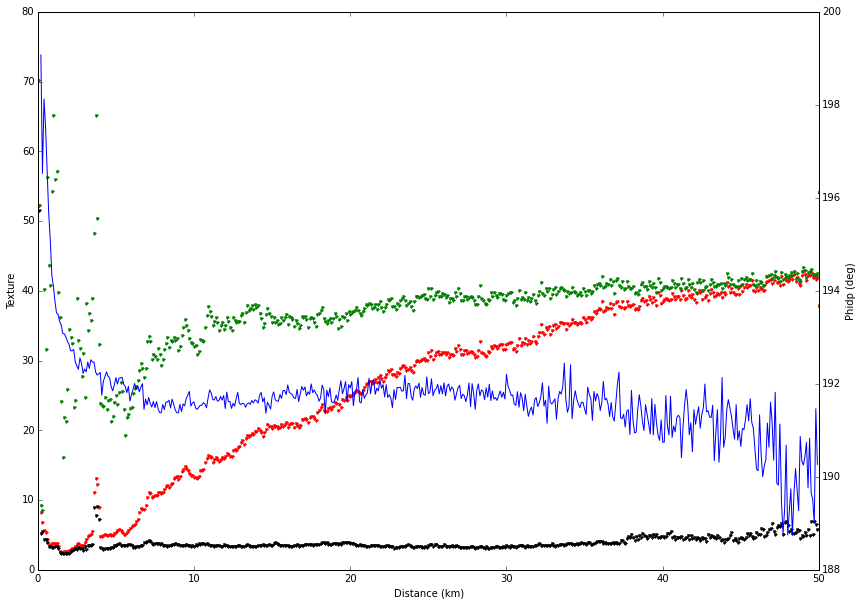

In [17]:
ncp_array = radar.fields['normalized_coherent_power']['data']
w_texture_complex = radar.fields['differential_phase_texture']['data']
w_texture_phidp_filt = np.ma.masked_where(ncp_array > .5, w_texture_complex )
w_texture_phidp_good = np.ma.masked_where(ncp_array < .5, w_texture_complex )

mean_text_range_filt = w_texture_phidp_filt.mean(axis=0)
mean_text_range = w_texture_complex.mean(axis=0)
mean_text_range_good = w_texture_phidp_good.mean(axis=0)
ranges = radar.range['data']/1000.0
fig = plt.figure(figsize = [14,10])
plt.plot(ranges, mean_text_range/2.0, 'r.')
plt.plot(ranges, mean_text_range_filt/2.0, 'g.')
plt.plot(ranges, mean_text_range_good/2.0, 'k.')
plt.xlabel('Distance (km)')
plt.ylabel('Texture')
plt.twinx()

good_phidp = np.ma.masked_where(w_texture_complex > 25, radar.fields['differential_phase']['data'])

plt.plot(ranges, good_phidp.mean(axis=0))
plt.ylabel('Phidp (deg)')

<matplotlib.colorbar.Colorbar instance at 0x283cd3950>

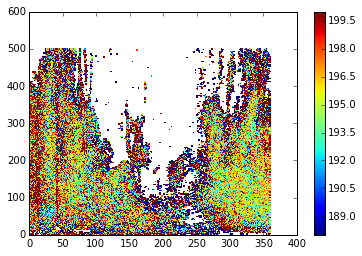

In [21]:
plt.pcolor(good_phidp[0:360, :].transpose(), vmin = 188, vmax = 200)
plt.colorbar()